In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones:

- initial_temp = np.logspace(2,6, num=6) #[1e2, 1e3, 1e4, 1e5, 1e6]
- final_temps = np.logspace(-3,1,num=5) #[1e-3, 1e-2, 1e-1, 1, 10]
- alphas = [0.90, 0.93, 0.95, 0.97, 0.98, 0.99, 0.995, 0.999]
- max_iters = [5_000, 10_000, 50_000, 100_000, 250_000]

In [18]:
df = pd.read_csv("../results/configurations/sa_configurations.csv")

In [19]:
print(df.head())
print(df.info())

  config_id  initial_temp  final_temp  alpha  max_iter  time  final_fitness  \
0   cfg_001         100.0       0.001    0.9      5000  0.15      15.833333   
1   cfg_002         100.0       0.001    0.9     10000  0.15      17.333333   
2   cfg_003         100.0       0.001    0.9     50000  0.16      17.333333   
3   cfg_004         100.0       0.001    0.9    100000  0.16      15.833333   
4   cfg_005         100.0       0.001    0.9    250000  0.18      17.333333   

   validity  
0      True  
1      True  
2      True  
3      True  
4      True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   config_id      1200 non-null   object 
 1   initial_temp   1200 non-null   float64
 2   final_temp     1200 non-null   float64
 3   alpha          1200 non-null   float64
 4   max_iter       1200 non-null   int64  
 5   time           1200 no

In [20]:
valid_df = df[df["validity"]].copy()

best_config = valid_df.sort_values(
    by=["final_fitness", "time"], ascending=[False, True]
).iloc[0]

In [21]:
print("Mejor configuración encontrada:")
print(best_config)

Mejor configuración encontrada:
config_id          cfg_165
initial_temp         100.0
final_temp            10.0
alpha                  0.9
max_iter            250000
time                  0.04
final_fitness    17.333333
validity              True
Name: 164, dtype: object


In [22]:
print("Resumen estadístico de las soluciones válidas:")
print(valid_df.describe())

Resumen estadístico de las soluciones válidas:
         initial_temp   final_temp        alpha       max_iter         time  \
count     1200.000000  1200.000000  1200.000000    1200.000000  1200.000000   
mean    198053.368769     2.222200     0.964250   83000.000000     2.942867   
std     363105.697686     3.908526     0.032804   90237.385017     5.537596   
min        100.000000     0.001000     0.900000    5000.000000     0.040000   
25%        630.957344     0.010000     0.945000   10000.000000     0.290000   
50%      14549.968010     0.100000     0.975000   50000.000000     0.690000   
75%     158489.319246     1.000000     0.991250  100000.000000     2.470000   
max    1000000.000000    10.000000     0.999000  250000.000000    33.220000   

       final_fitness  
count    1200.000000  
mean       17.149167  
std         0.558354  
min        10.833333  
25%        17.333333  
50%        17.333333  
75%        17.333333  
max        17.333333  


In [23]:
print("Promedio de tiempo por configuración:")
print(valid_df["time"].mean())

Promedio de tiempo por configuración:
2.9428666666666663


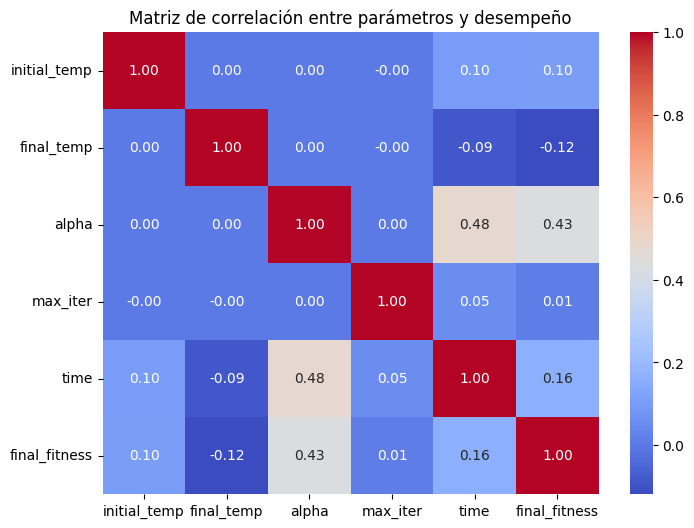

In [24]:
corr = valid_df[
    ["initial_temp", "final_temp", "alpha", "max_iter", "time", "final_fitness"]
].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre parámetros y desempeño")
plt.show()

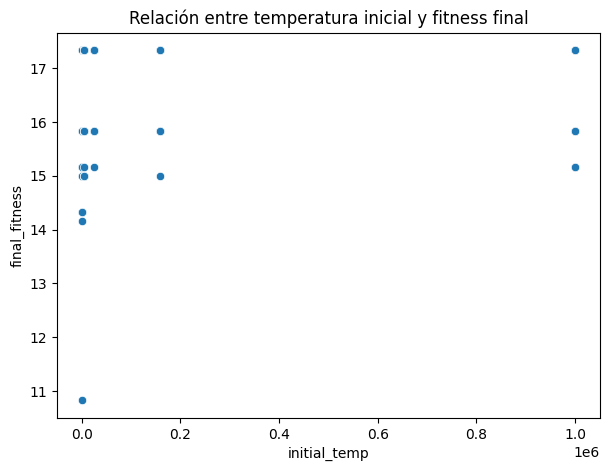

In [25]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="initial_temp", y="final_fitness")
plt.title("Relación entre temperatura inicial y fitness final")
plt.show()

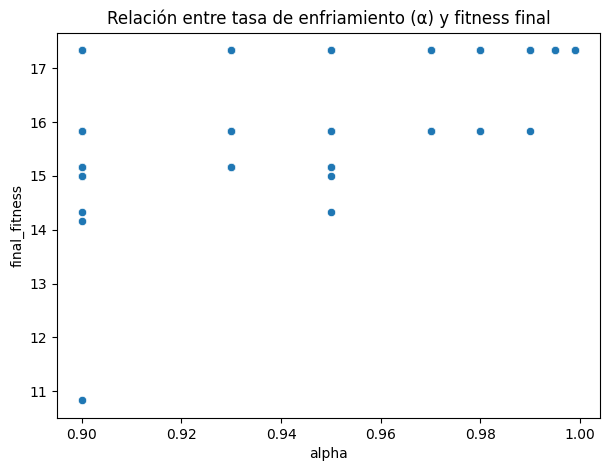

In [26]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="alpha", y="final_fitness")
plt.title("Relación entre tasa de enfriamiento (α) y fitness final")
plt.show()

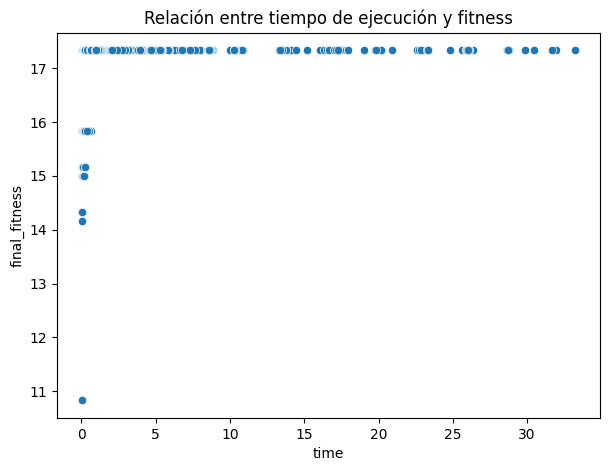

In [27]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="time", y="final_fitness")
plt.title("Relación entre tiempo de ejecución y fitness")
plt.show()

In [28]:
valid_df["fitness_per_time"] = valid_df["final_fitness"] / valid_df["time"]
best_efficiency = valid_df.loc[valid_df["fitness_per_time"].idxmax()]

print("Configuración más eficiente (mejor fitness/tiempo):")
print(best_efficiency)

Configuración más eficiente (mejor fitness/tiempo):
config_id              cfg_165
initial_temp             100.0
final_temp                10.0
alpha                      0.9
max_iter                250000
time                      0.04
final_fitness        17.333333
validity                  True
fitness_per_time    433.333333
Name: 164, dtype: object


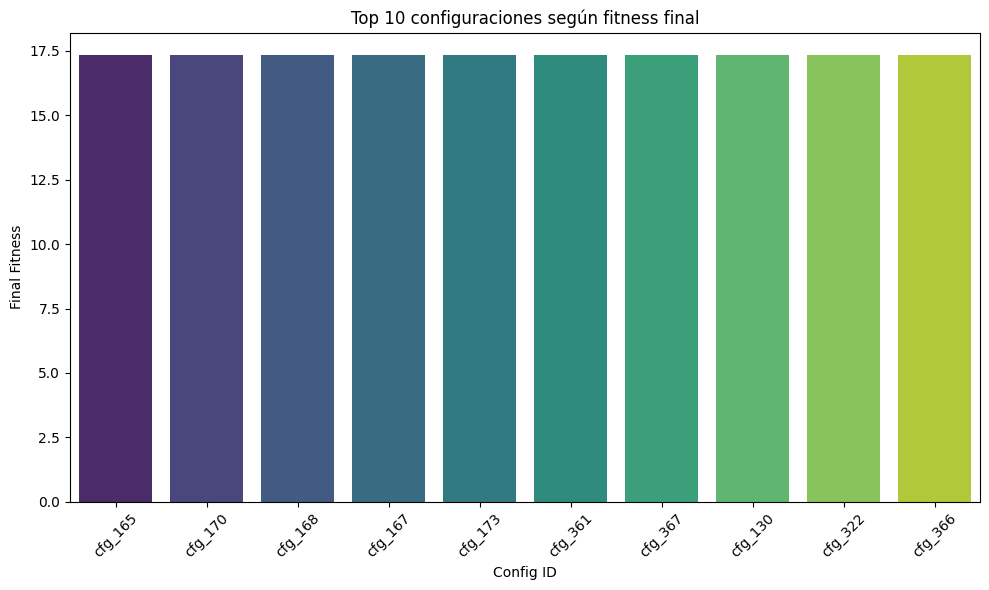

In [29]:
ranking = valid_df.sort_values(
    by=["final_fitness", "time"], ascending=[False, True]
).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=ranking,
    x="config_id",
    y="final_fitness",
    hue="config_id",
    palette="viridis",
    legend=False,
)
plt.title("Top 10 configuraciones según fitness final")
plt.xlabel("Config ID")
plt.ylabel("Final Fitness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

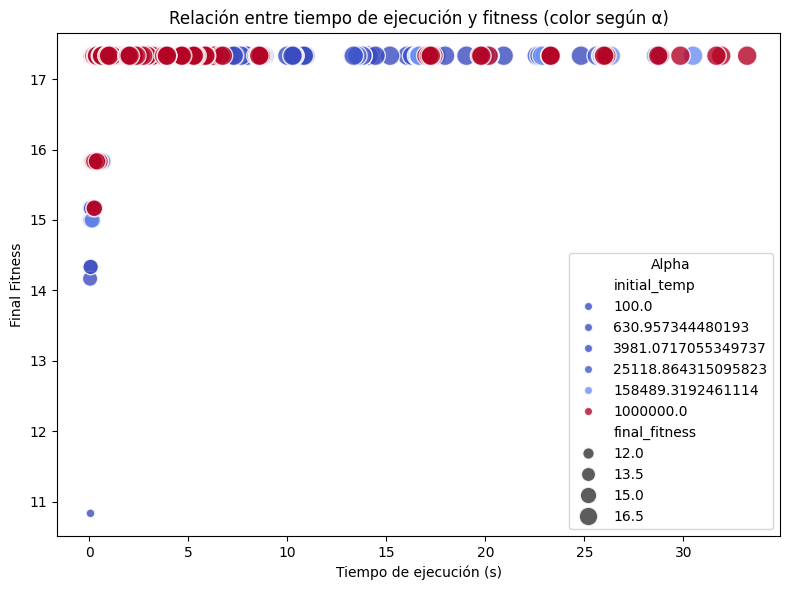

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=valid_df,
    x="time",
    y="final_fitness",
    hue="initial_temp",
    palette="coolwarm",
    size="final_fitness",
    sizes=(40, 200),
    alpha=0.8,
)
plt.title("Relación entre tiempo de ejecución y fitness (color según α)")
plt.xlabel("Tiempo de ejecución (s)")
plt.ylabel("Final Fitness")
plt.legend(title="Alpha")
plt.tight_layout()
plt.show()

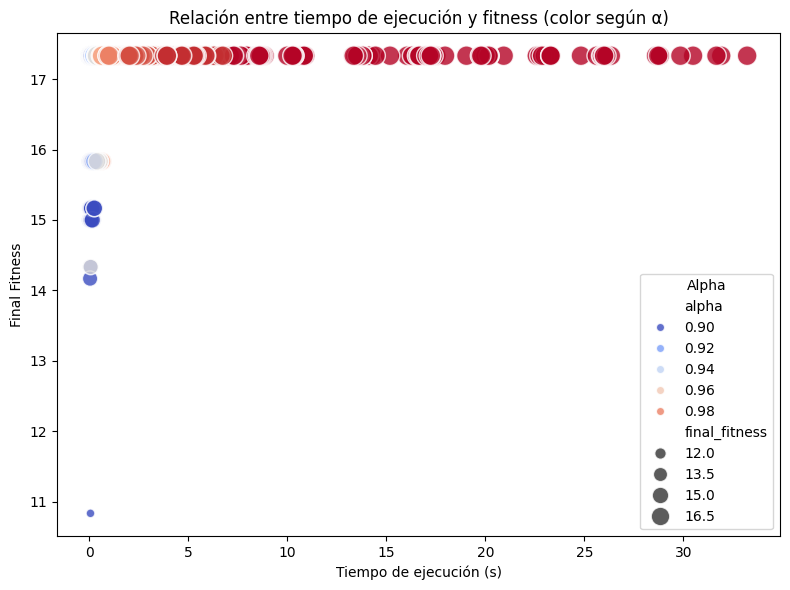

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=valid_df,
    x="time",
    y="final_fitness",
    hue="alpha",
    palette="coolwarm",
    size="final_fitness",
    sizes=(40, 200),
    alpha=0.8,
)
plt.title("Relación entre tiempo de ejecución y fitness (color según α)")
plt.xlabel("Tiempo de ejecución (s)")
plt.ylabel("Final Fitness")
plt.legend(title="Alpha")
plt.tight_layout()
plt.show()

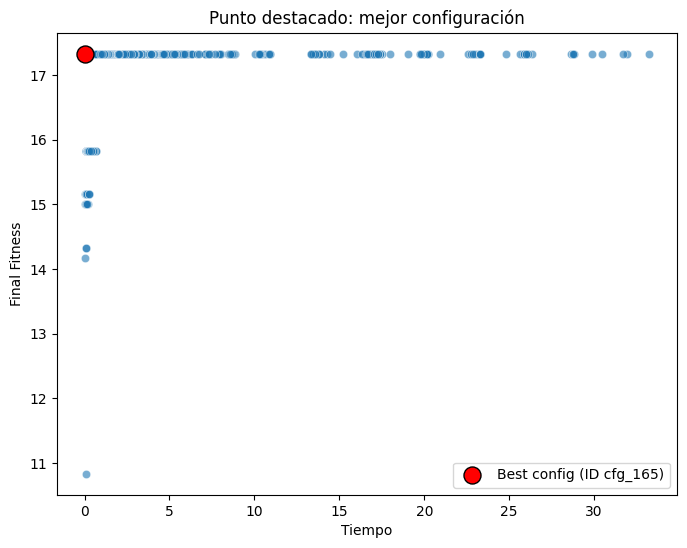

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=valid_df, x="time", y="final_fitness", alpha=0.6)
plt.scatter(
    best_config["time"],
    best_config["final_fitness"],
    color="red",
    s=150,
    edgecolor="black",
    label=f"Best config (ID {best_config['config_id']})",
)
plt.legend()
plt.title("Punto destacado: mejor configuración")
plt.xlabel("Tiempo")
plt.ylabel("Final Fitness")
plt.show()